In [2]:
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 42.3 MB/s  0:00:006m0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 60.3 MB/s  0:00:006m0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [pandas]2m1/2 [pandas]

[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [4]:
import pandas as pd
df = pd.read_csv("drug_discovery_virtual_screening.csv")

In [6]:
df.head()

,compound_id,protein_id,molecular_weight,logp,h_bond_donors,h_bond_acceptors,rotatable_bonds,polar_surface_area,compound_clogp,protein_length,protein_pi,hydrophobicity,binding_site_size,mw_ratio,logp_pi_interaction,binding_affinity,active
0,CID_00000,PID_361,499.671415,2.487233,1,7,4,113.350817,4.050696,678,6.019657,0.812534,12.512165,0.736978,14.972288,5.996665,0
1,CID_00001,PID_165,436.173570,3.283222,3,4,4,71.981132,3.704408,876,6.447408,0.651417,11.538420,0.497915,21.168271,6.445742,0
2,CID_00002,PID_168,514.768854,NaN,2,11,11,83.936307,1.869610,658,3.925837,0.633467,13.155702,0.782323,9.074061,5.689583,0
3,CID_00003,PID_226,602.302986,3.038058,0,5,5,79.868125,2.451909,312,7.597056,0.513038,12.071822,1.930458,23.080293,6.043438,0
4,CID_00004,PID_224,426.584663,0.659578,2,4,5,88.198676,1.771936,1418,4.249454,0.613571,15.850448,0.300835,2.802846,4.845055,0


In [7]:
df.shape

(2000, 17)

In [8]:
df.columns

Index(['compound_id', 'protein_id', 'molecular_weight', 'logp',
       'h_bond_donors', 'h_bond_acceptors', 'rotatable_bonds',
       'polar_surface_area', 'compound_clogp', 'protein_length', 'protein_pi',
       'hydrophobicity', 'binding_site_size', 'mw_ratio',
       'logp_pi_interaction', 'binding_affinity', 'active'],
      dtype='str')

In [9]:
df.dtypes

compound_id                str
protein_id                 str
molecular_weight       float64
logp                   float64
h_bond_donors            int64
h_bond_acceptors         int64
rotatable_bonds          int64
polar_surface_area     float64
compound_clogp         float64
protein_length           int64
protein_pi             float64
hydrophobicity         float64
binding_site_size      float64
mw_ratio               float64
logp_pi_interaction    float64
binding_affinity       float64
active                   int64
dtype: object

In [10]:
df.isna().sum()

compound_id             0
protein_id              0
molecular_weight        0
logp                   60
h_bond_donors           0
h_bond_acceptors        0
rotatable_bonds         0
polar_surface_area     60
compound_clogp          0
protein_length          0
protein_pi              0
hydrophobicity         60
binding_site_size       0
mw_ratio                0
logp_pi_interaction     0
binding_affinity        0
active                  0
dtype: int64

In [11]:
df.groupby("protein_id").size()

protein_id
PID_100    3
PID_101    5
PID_102    5
PID_103    7
PID_104    4
          ..
PID_495    5
PID_496    5
PID_497    4
PID_498    6
PID_499    2
Length: 400, dtype: int64

In [13]:
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 38.6 MB/s  0:00:00m0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 46.6 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 35.8 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 52.4 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7/7 [matplotlib]7 [matplotlib]

[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [14]:
import matplotlib.pyplot as plt

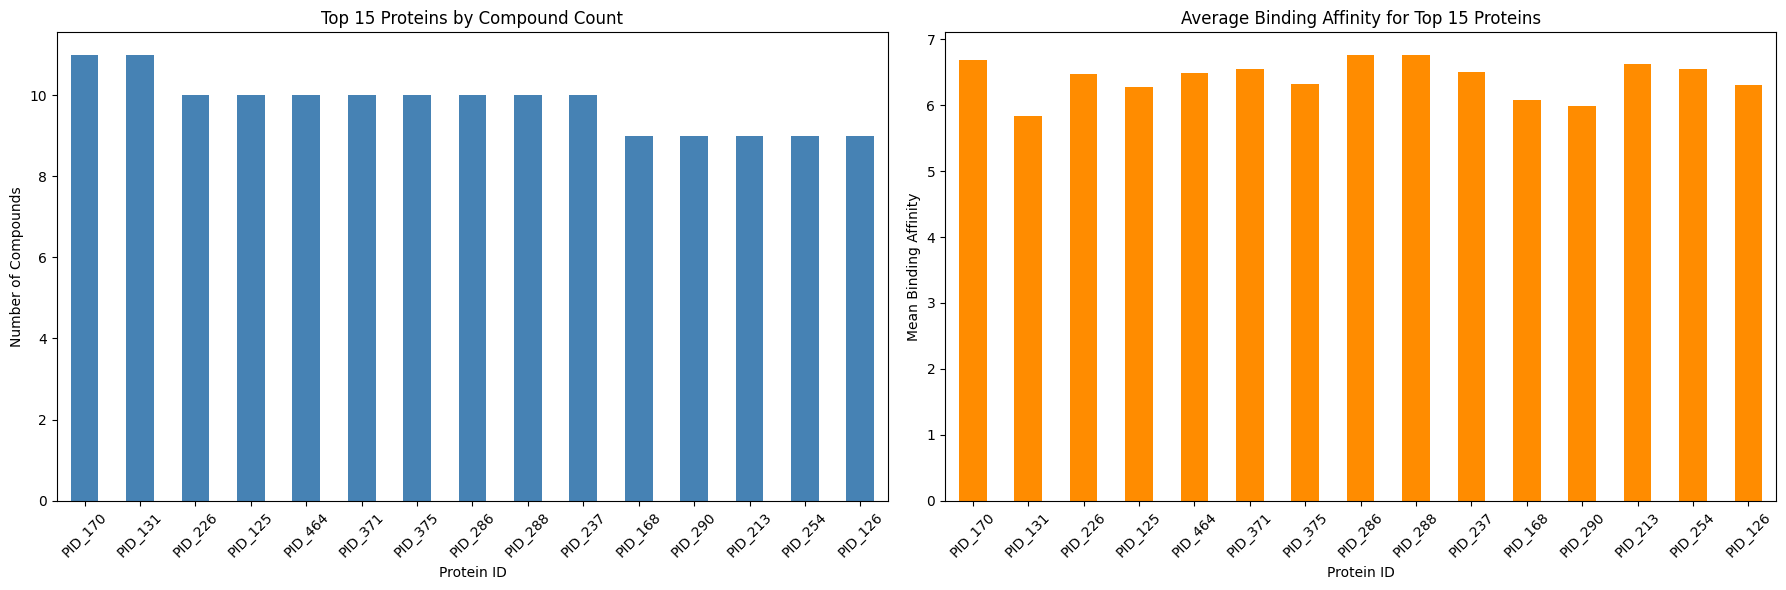

In [17]:
# Protein-level patterns: top proteins by sample count and mean binding affinity
top_n = 15

# Top proteins by number of compounds
top_proteins = df['protein_id'].value_counts().head(top_n)

# Mean binding affinity for those same proteins
mean_affinity = (
    df[df['protein_id'].isin(top_proteins.index)]
    .groupby('protein_id')['binding_affinity']
    .mean()
    .reindex(top_proteins.index)
)

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot 1: count per protein
top_proteins.plot(kind='bar', ax=axes[0], color='steelblue')
axes[0].set_title(f'Top {top_n} Proteins by Compound Count')
axes[0].set_xlabel('Protein ID')
axes[0].set_ylabel('Number of Compounds')
axes[0].tick_params(axis='x', rotation=45)

# Plot 2: average binding affinity for same proteins
mean_affinity.plot(kind='bar', ax=axes[1], color='darkorange')
axes[1].set_title(f'Average Binding Affinity for Top {top_n} Proteins')
axes[1].set_xlabel('Protein ID')
axes[1].set_ylabel('Mean Binding Affinity')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()